# Relax Inc



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

In [2]:
# The data contains users information in two csv files.
# Load the csv data as pandas dataframe. 

df_users = pd.read_csv('takehome_users.csv',
                       parse_dates=['creation_time'],
                       index_col=['creation_time'],
                       engine='python')

df_eng = pd.read_csv('takehome_user_engagement.csv',
                     parse_dates=['time_stamp'])

# The df_eng data contains the users engagement. We
# first figure out if or not a particular user is
# adopted. A user is adopted if the user makes more
# than three times in a week

# First group by the engagement by userid and the dates.
visit_count = df_eng.groupby(['user_id', 'time_stamp']).visited.count()

# Write a function that calculates if a particular member visits more
# than 3 times in a week. 
check_adopt = lambda x: visit_count[x].resample('w').sum().max()>=3

member_id = visit_count.index.levels[0]
adopted = list(map(check_adopt, member_id))

df_adopted = pd.DataFrame({'user_id': member_id, 'adopted': adopted})


In [3]:
# Merge two dataframe to combine the information
df = df_users.merge(df_adopted,
                    left_on='object_id',
                    right_on='user_id')

# create a new columns to identify the user's
# email category
df['mail'] = df.email.apply(lambda x: x.split('@')[1].split('.')[0])
df.head()


,object_id,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted,mail
0,1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1,False,yahoo
1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2,True,gustr
2,3,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,3,False,gustr
3,4,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,4,False,yahoo
4,5,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,5,False,yahoo


Only around 16 percent of the users were adopted during a year of time. Majority of the users were not adopted. 

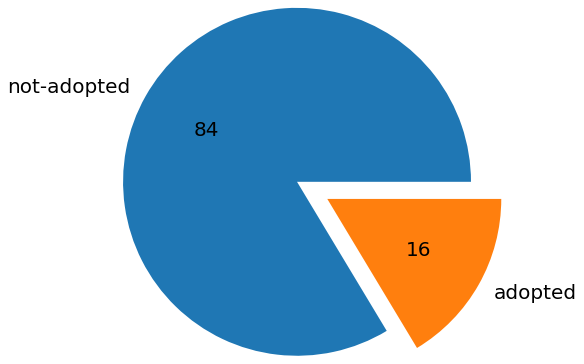

In [4]:
# Grouping by the adopted users.
adopted_frac = df.groupby('adopted').count().name

ax = plt.gca()
adopted_frac.plot(kind='pie', autopct='%.0f', radius=2.0,
                  labels=['not-adopted', 'adopted'],
                  textprops={'fontsize': 20}, ax=ax,
                  explode=(0.2, 0.2), rotatelabels=False)
ax.set_ylabel("")
plt.show()

### Source of users:
The users come from different source. Majority of users join by organization invite. But there are big fraction of users who join from invitation of guests or signup via the website. 

Text(0, 0.5, '')

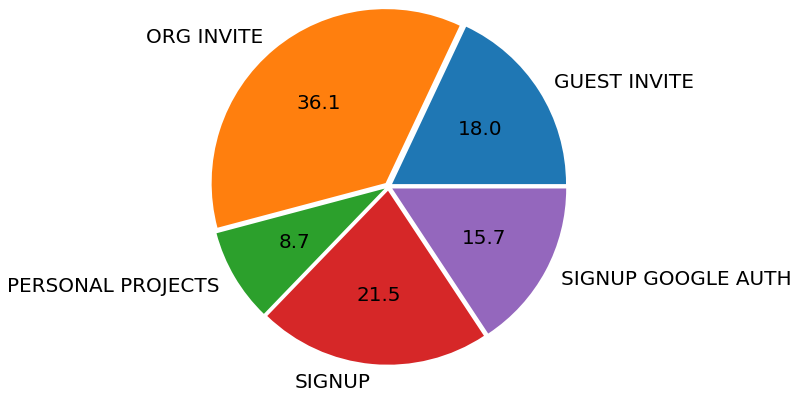

In [5]:
# Grouping by creation source

df1 = df.groupby('creation_source').count().name

labels = [str(element).replace('_', ' ')
          for element in list(df1.index)]
explode = [0.05 for element in labels]

ax = plt.gca()
df1.plot(kind='pie', autopct='%.1f',
         radius=2.0, labels=labels,
         explode=explode, ax=ax,
         textprops={'fontsize': 20},
        rotatelabels=False)

ax.set_ylabel('')

The rate of new members was growing over time. In july 2013, only 100 members join per week, which becomes 250 in the next July. 

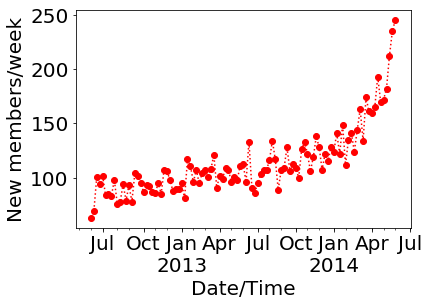

In [6]:
ax = plt.gca()
df_users.resample('w').count().email.plot(marker='o',
                                          color='r',
                                          linestyle=':',
                                          ax=ax)

ax.set_xlabel('Date/Time', fontsize=20)
ax.set_ylabel('New members/week', fontsize=20)
ax.tick_params(axis='both', labelsize=20)

Adopted user are those user that signup at least three times per week. The majority of the adopted user remain active until the very late (i.e. the maximum time of the data collection). Non-adopted user can leave at any time. 

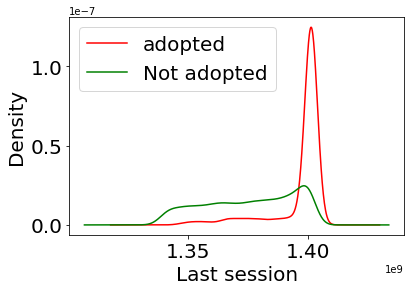

In [7]:
ax = plt.gca()
df[df.adopted == True].last_session_creation_time.\
plot(kind='kde', color='r', label='adopted')

df[df.adopted == False].last_session_creation_time.\
plot(kind='kde', color='g', label='Not adopted')

ax.set_xlabel('Last session', fontsize=20)
ax.set_ylabel('Density', fontsize=20)
ax.tick_params(axis='both', labelsize=20)
ax.legend(fontsize=20)

There is a slight variation of the users adopted on their creation. Users invited as a guest or personal projects stay longer compared to other categories. 

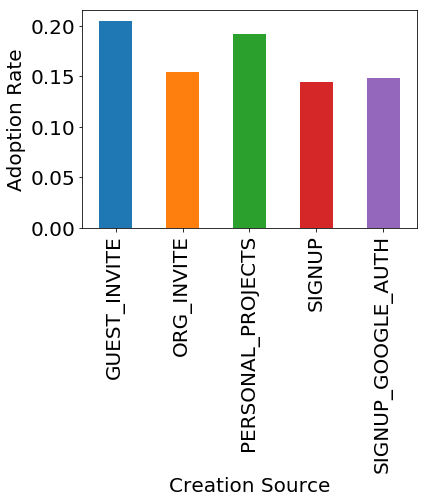

In [8]:
adoption_rate = df.groupby('creation_source').sum().adopted\
                /df.groupby('creation_source').count().adopted

ax = plt.gca()
adoption_rate.plot(kind='bar', ax=ax)

ax.set_xlabel('Creation Source', fontsize=20)
ax.set_ylabel('Adoption Rate', fontsize=20)
ax.tick_params(axis='both', labelsize=20)

users opted in the mailing list does not have any influence in the adoption of users. 

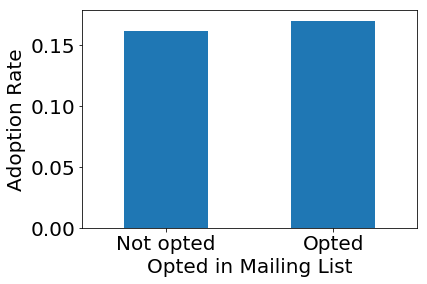

In [9]:
df1 = df.groupby(['opted_in_to_mailing_list',
                  'adopted']).count().name

prop_not_opted = df1[0][True]/(df1[0][True] + df1[0][False])
prop_opted = df1[1][True]/(df1[1][True] + df1[1][False])

df1 = pd.DataFrame([prop_not_opted, prop_opted],
                   index=['Not opted', 'Opted'])

ax = plt.gca()
s1 = df1.plot(kind='bar', rot=0, legend=False, ax=ax)

ax.set_xlabel('Opted in Mailing List', fontsize=20)
ax.set_ylabel('Adoption Rate', fontsize=20)
ax.tick_params(axis='both', labelsize=20)

Similarly the enabling for marketing drip does not affect much on the adoption of the user. 

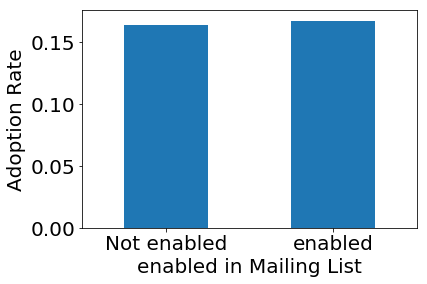

In [10]:
df1 = df.groupby(['enabled_for_marketing_drip',
                  'adopted']).count().name

prop_not_enabled = df1[0][True]/(df1[0][True] + df1[0][False])
prop_enabled = df1[1][True]/(df1[1][True] + df1[1][False])

df1 = pd.DataFrame([prop_not_enabled, prop_enabled],
                   index=['Not enabled', 'enabled'])

ax = plt.gca()
s1 = df1.plot(kind='bar', rot=0, legend=False, ax=ax)

ax.set_xlabel('enabled in Mailing List', fontsize=20)
ax.set_ylabel('Adoption Rate', fontsize=20)
ax.tick_params(axis='both', labelsize=20)

Most of the users use gmail and yahoo account. 

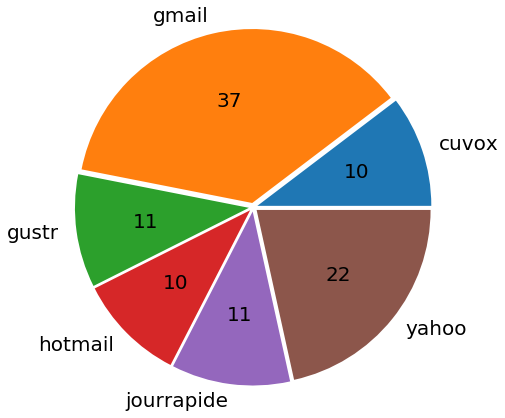

In [11]:
adopted_frac = df.groupby('mail').count().name
adopted_frac = adopted_frac[adopted_frac>2]
explode = [0.05 for element in adopted_frac.index]
ax = plt.gca()
adopted_frac.plot(kind='pie', autopct='%.0f', radius=2.0,
                  explode=explode,
                  textprops={'fontsize': 20}, ax=ax,
                   rotatelabels=False)
ax.set_ylabel("")
plt.show()